# Diabetes Health Indicator Using Machine Learning

Imports and Settings

In [70]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Importing Machine Learning Libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split

# To plot the graphs in the notebook
%matplotlib inline

Exploreing the Dataset

In [71]:
# Importing the dataset
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
dataset

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [72]:
# Checking the shape of the dataset
dataset.shape

(253680, 22)

In [73]:
# Checking the columns of the dataset
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [74]:
# Checking the data types of the columns
dataset.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

array([[<AxesSubplot: title={'center': 'Diabetes_012'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubplot

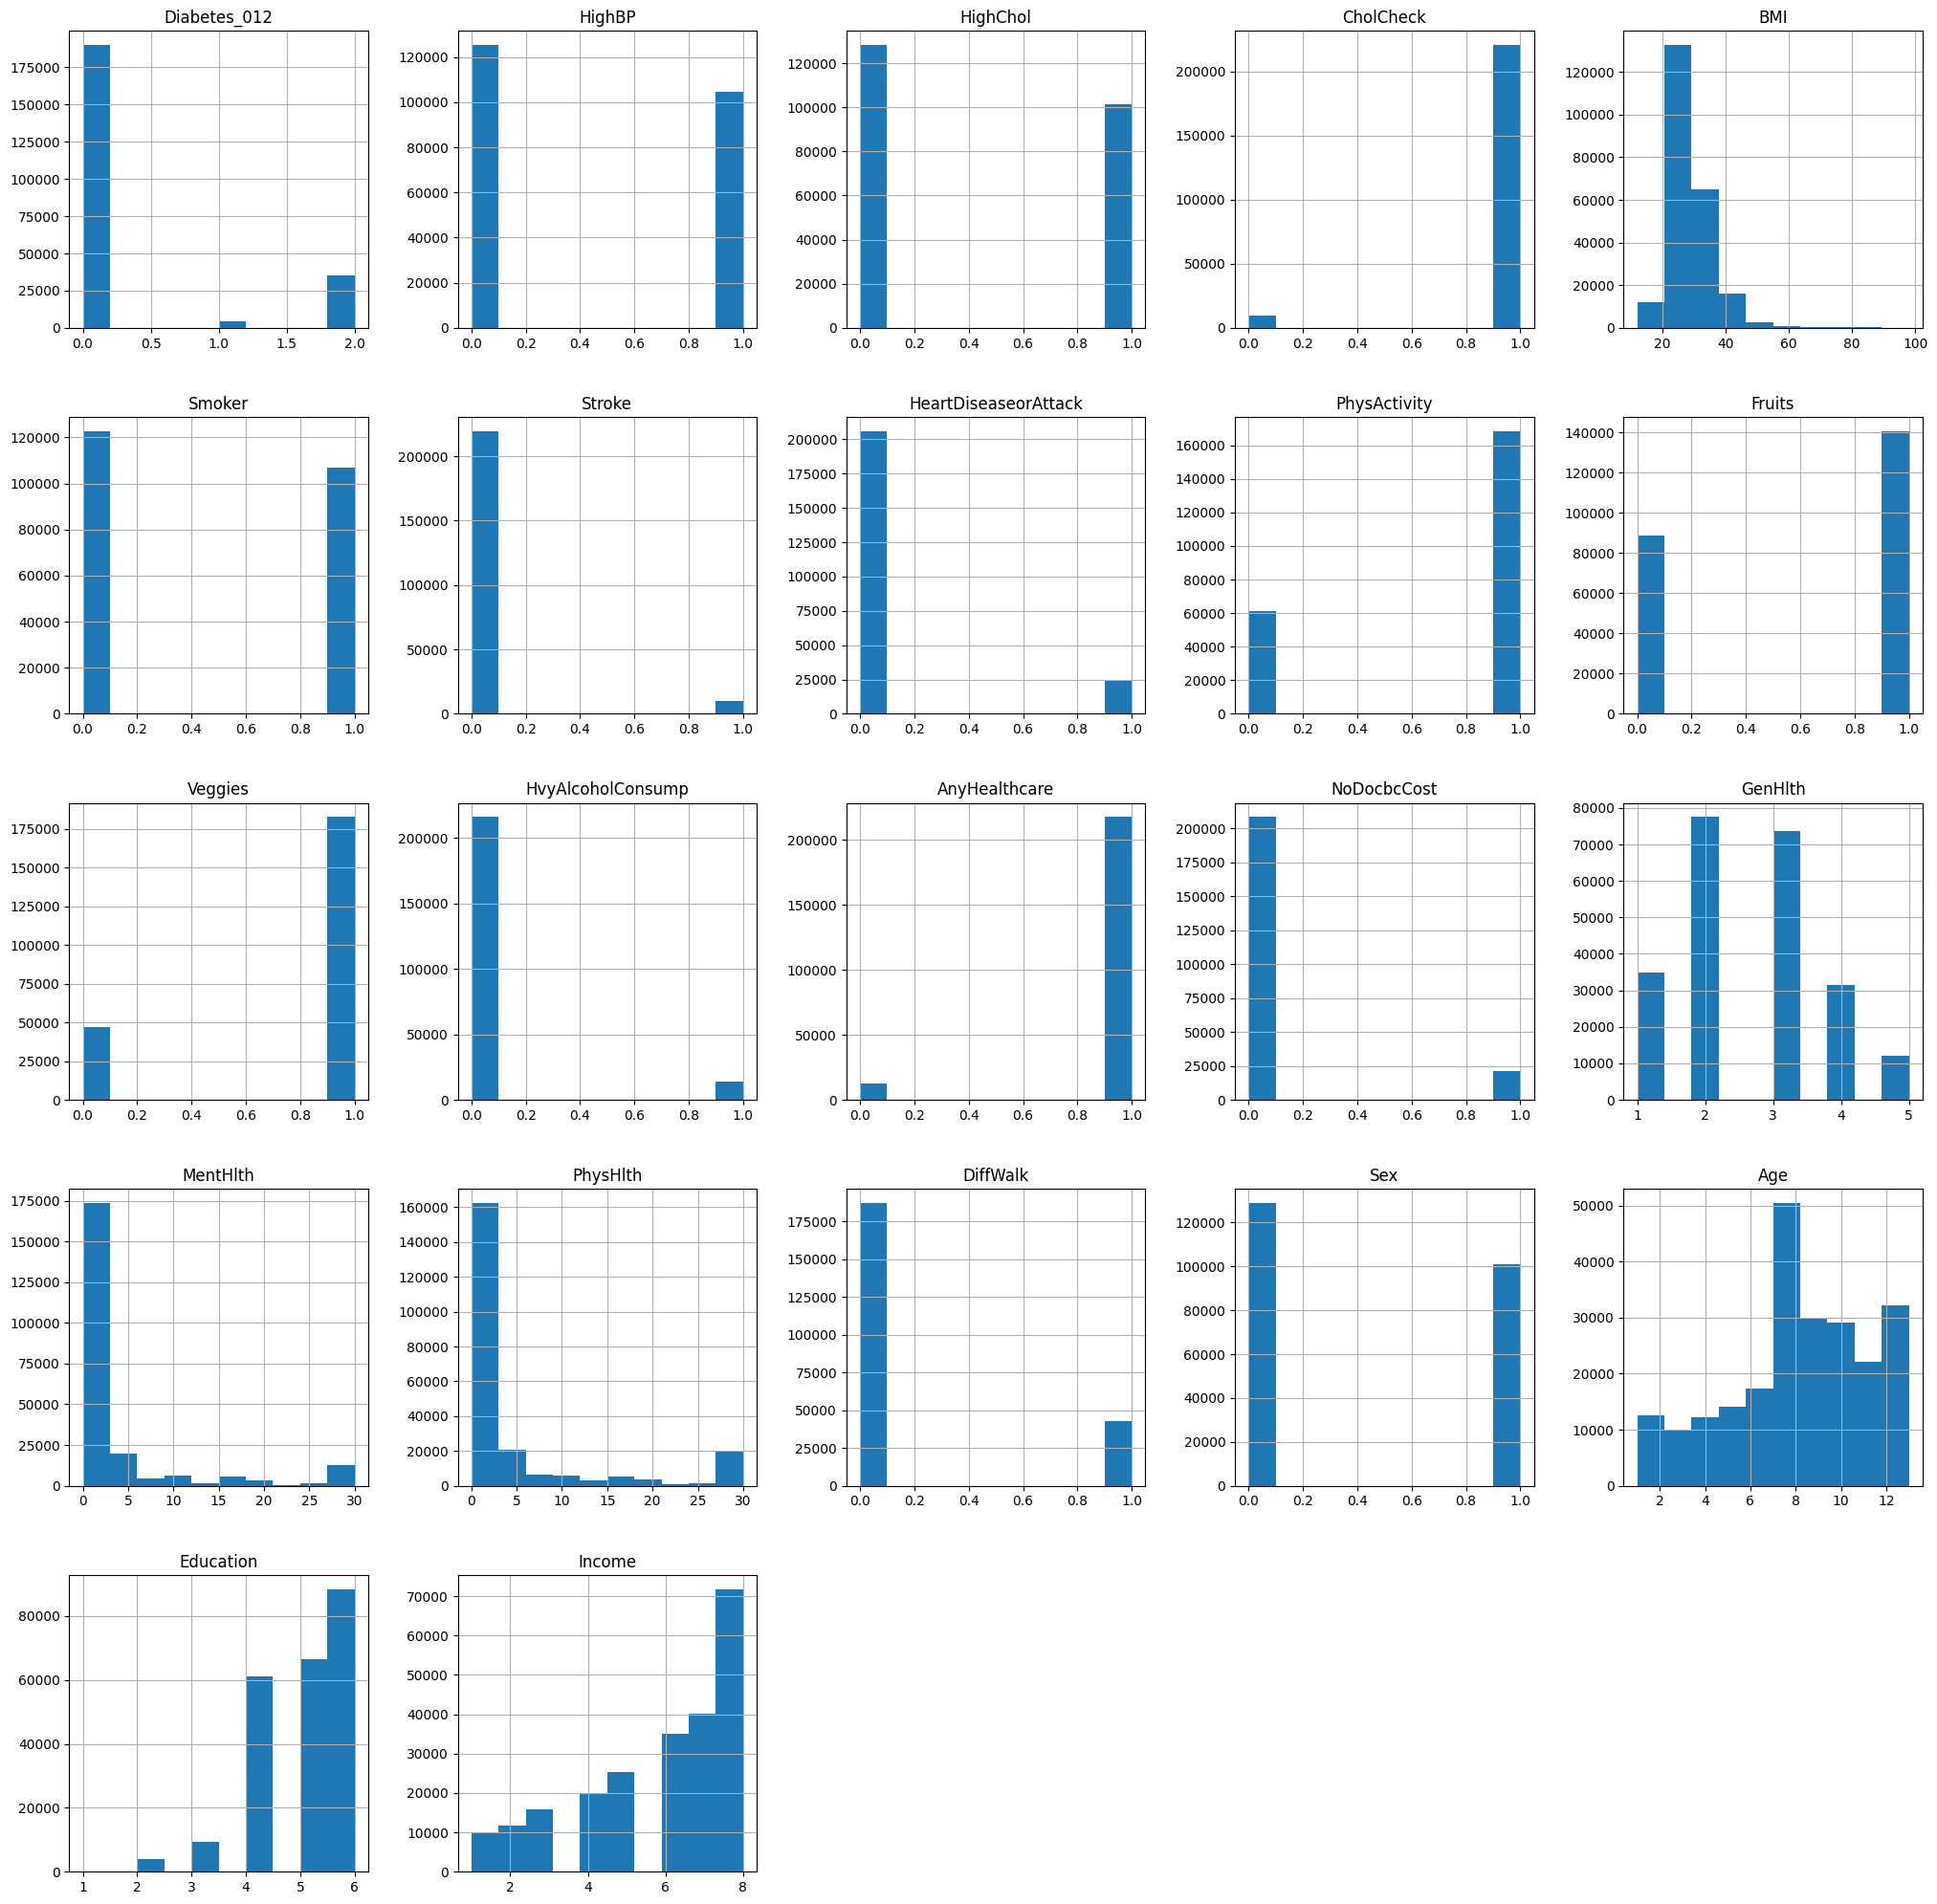

In [163]:
# Ploted the graph to check the distribution of the data
dataset.hist(figsize=(25,25))

# Data preprocessing

In [75]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [76]:
# Checking the number of null values in each column
dataset.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [165]:
# # Return numerical summary of each attribute of iris
dataset.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [78]:
# Checking the number of unique values in each column
dataset.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [172]:
# Checking duplicate values
dataset.duplicated().sum()

0

In [173]:
# Dropping the duplicate values
dataset.drop_duplicates(inplace=True)

# New Shape of the dataset
dataset.shape

(229649, 22)

<AxesSubplot: >

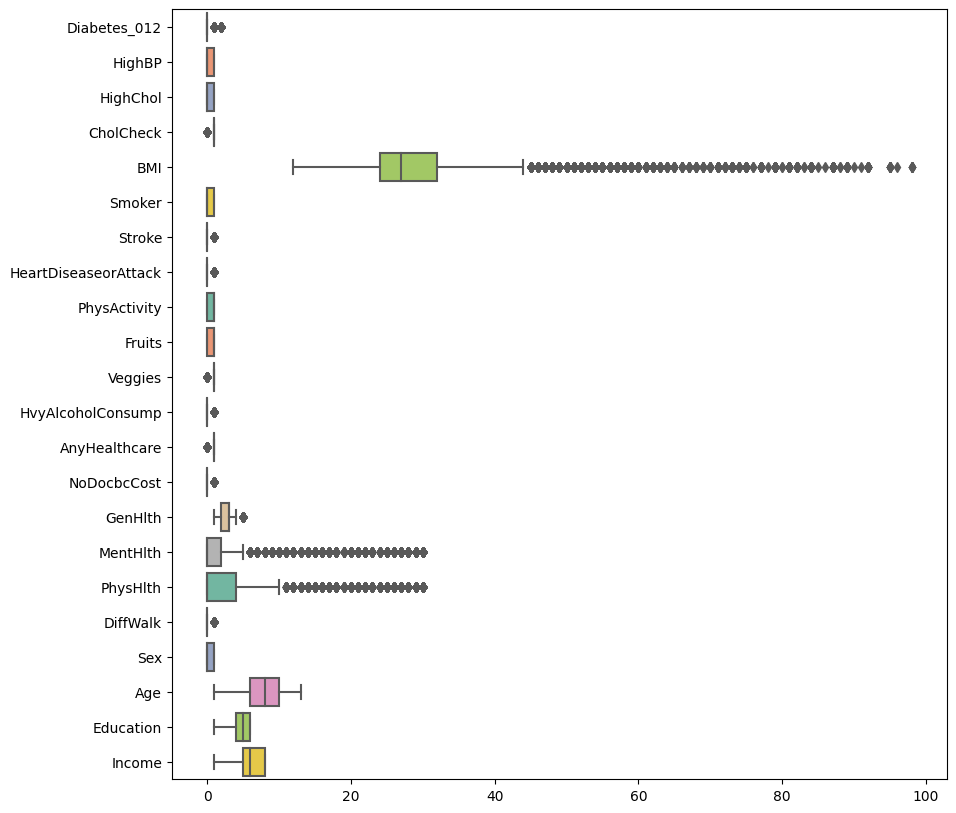

In [81]:
# Outlier Detection
# Boxplot for each attribute
plt.figure(figsize=(10,10))
sns.boxplot(data=dataset, orient="h", palette="Set2")

In [166]:
# BMI unique values
dataset['BMI'].unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [167]:
# Replacing BMI greater than 50 with the median of BMI
dataset['BMI'] = np.where(dataset['BMI'] > 50, dataset['BMI'].median(), dataset['BMI'])

In [168]:
# BMI unique values
dataset['BMI'].unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       49., 42., 17., 16., 41., 44., 50., 48., 46., 14., 15., 13., 12.])

# Exploratory Data Analysis

In [83]:
# let's check number of samples for each class of Terget variable
dataset['Diabetes_012'].value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

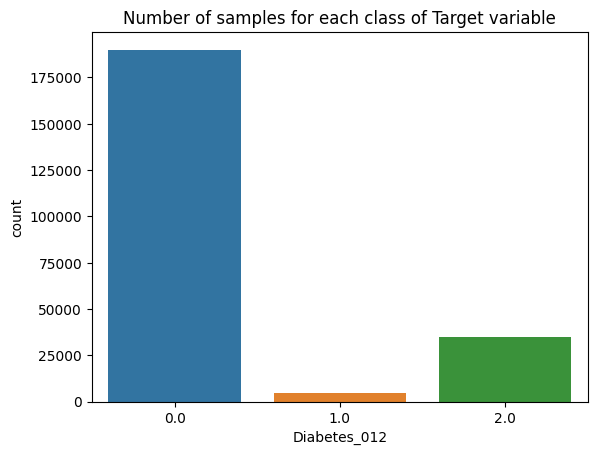

In [84]:
# let's visualise the number of samples for each class with count plot
sns.countplot(x ='Diabetes_012', data = dataset)
plt.title("Number of samples for each class of Target variable");

<AxesSubplot: >

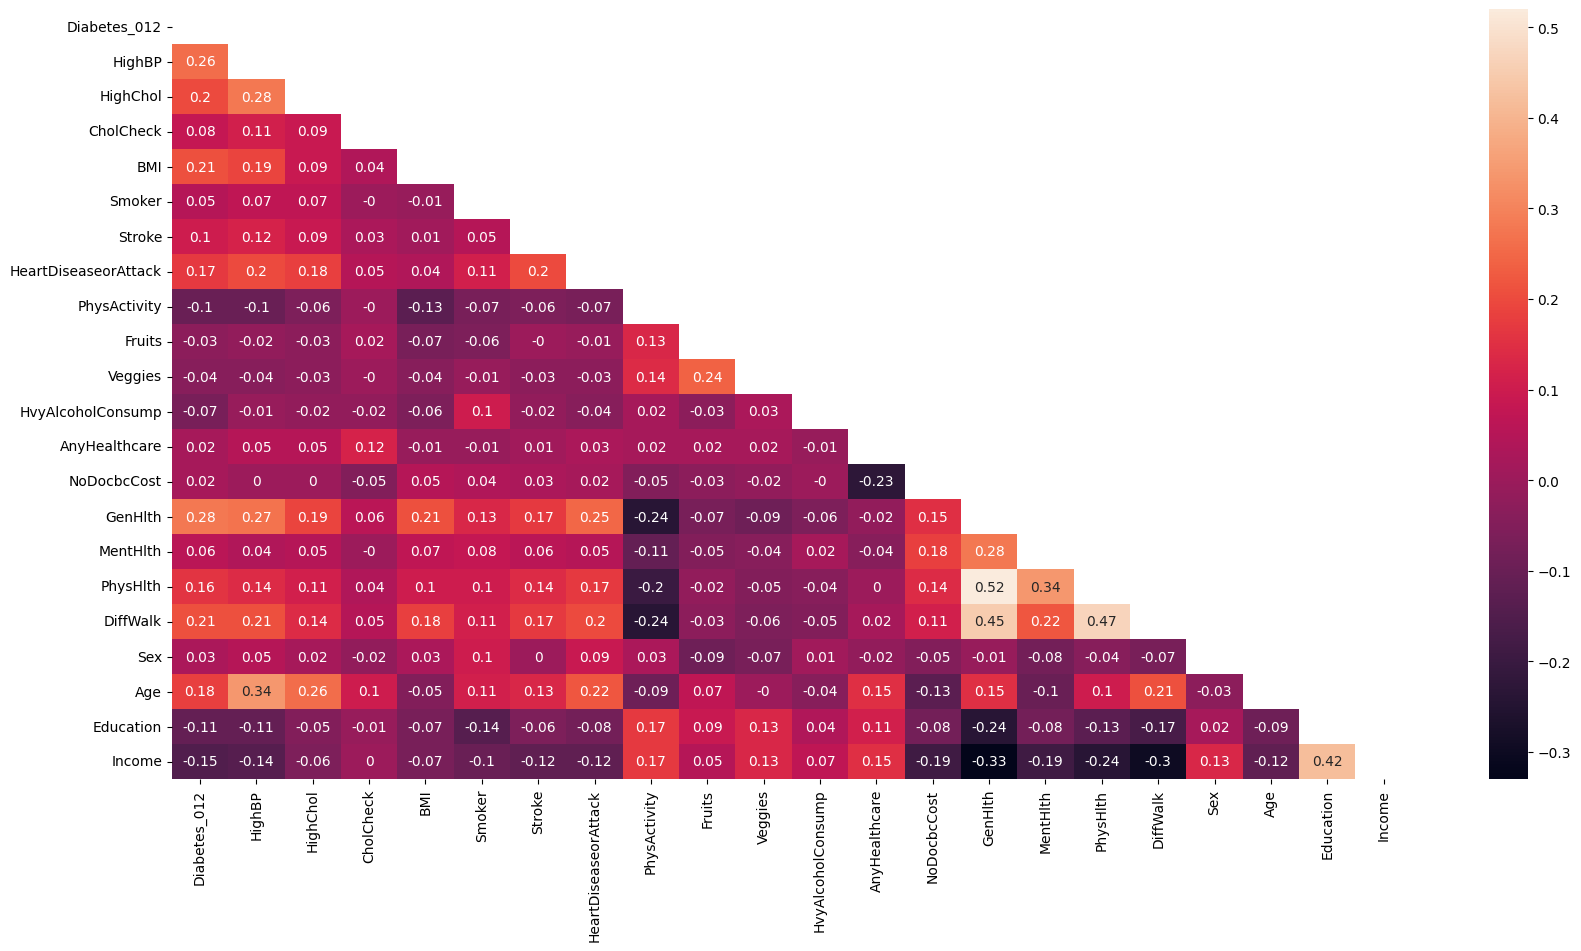

In [85]:
# Correlation Matrix between all the features
correlation_matrix = dataset.corr().round(2)

# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)

# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# changing the figure size
plt.figure(figsize=(20, 10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

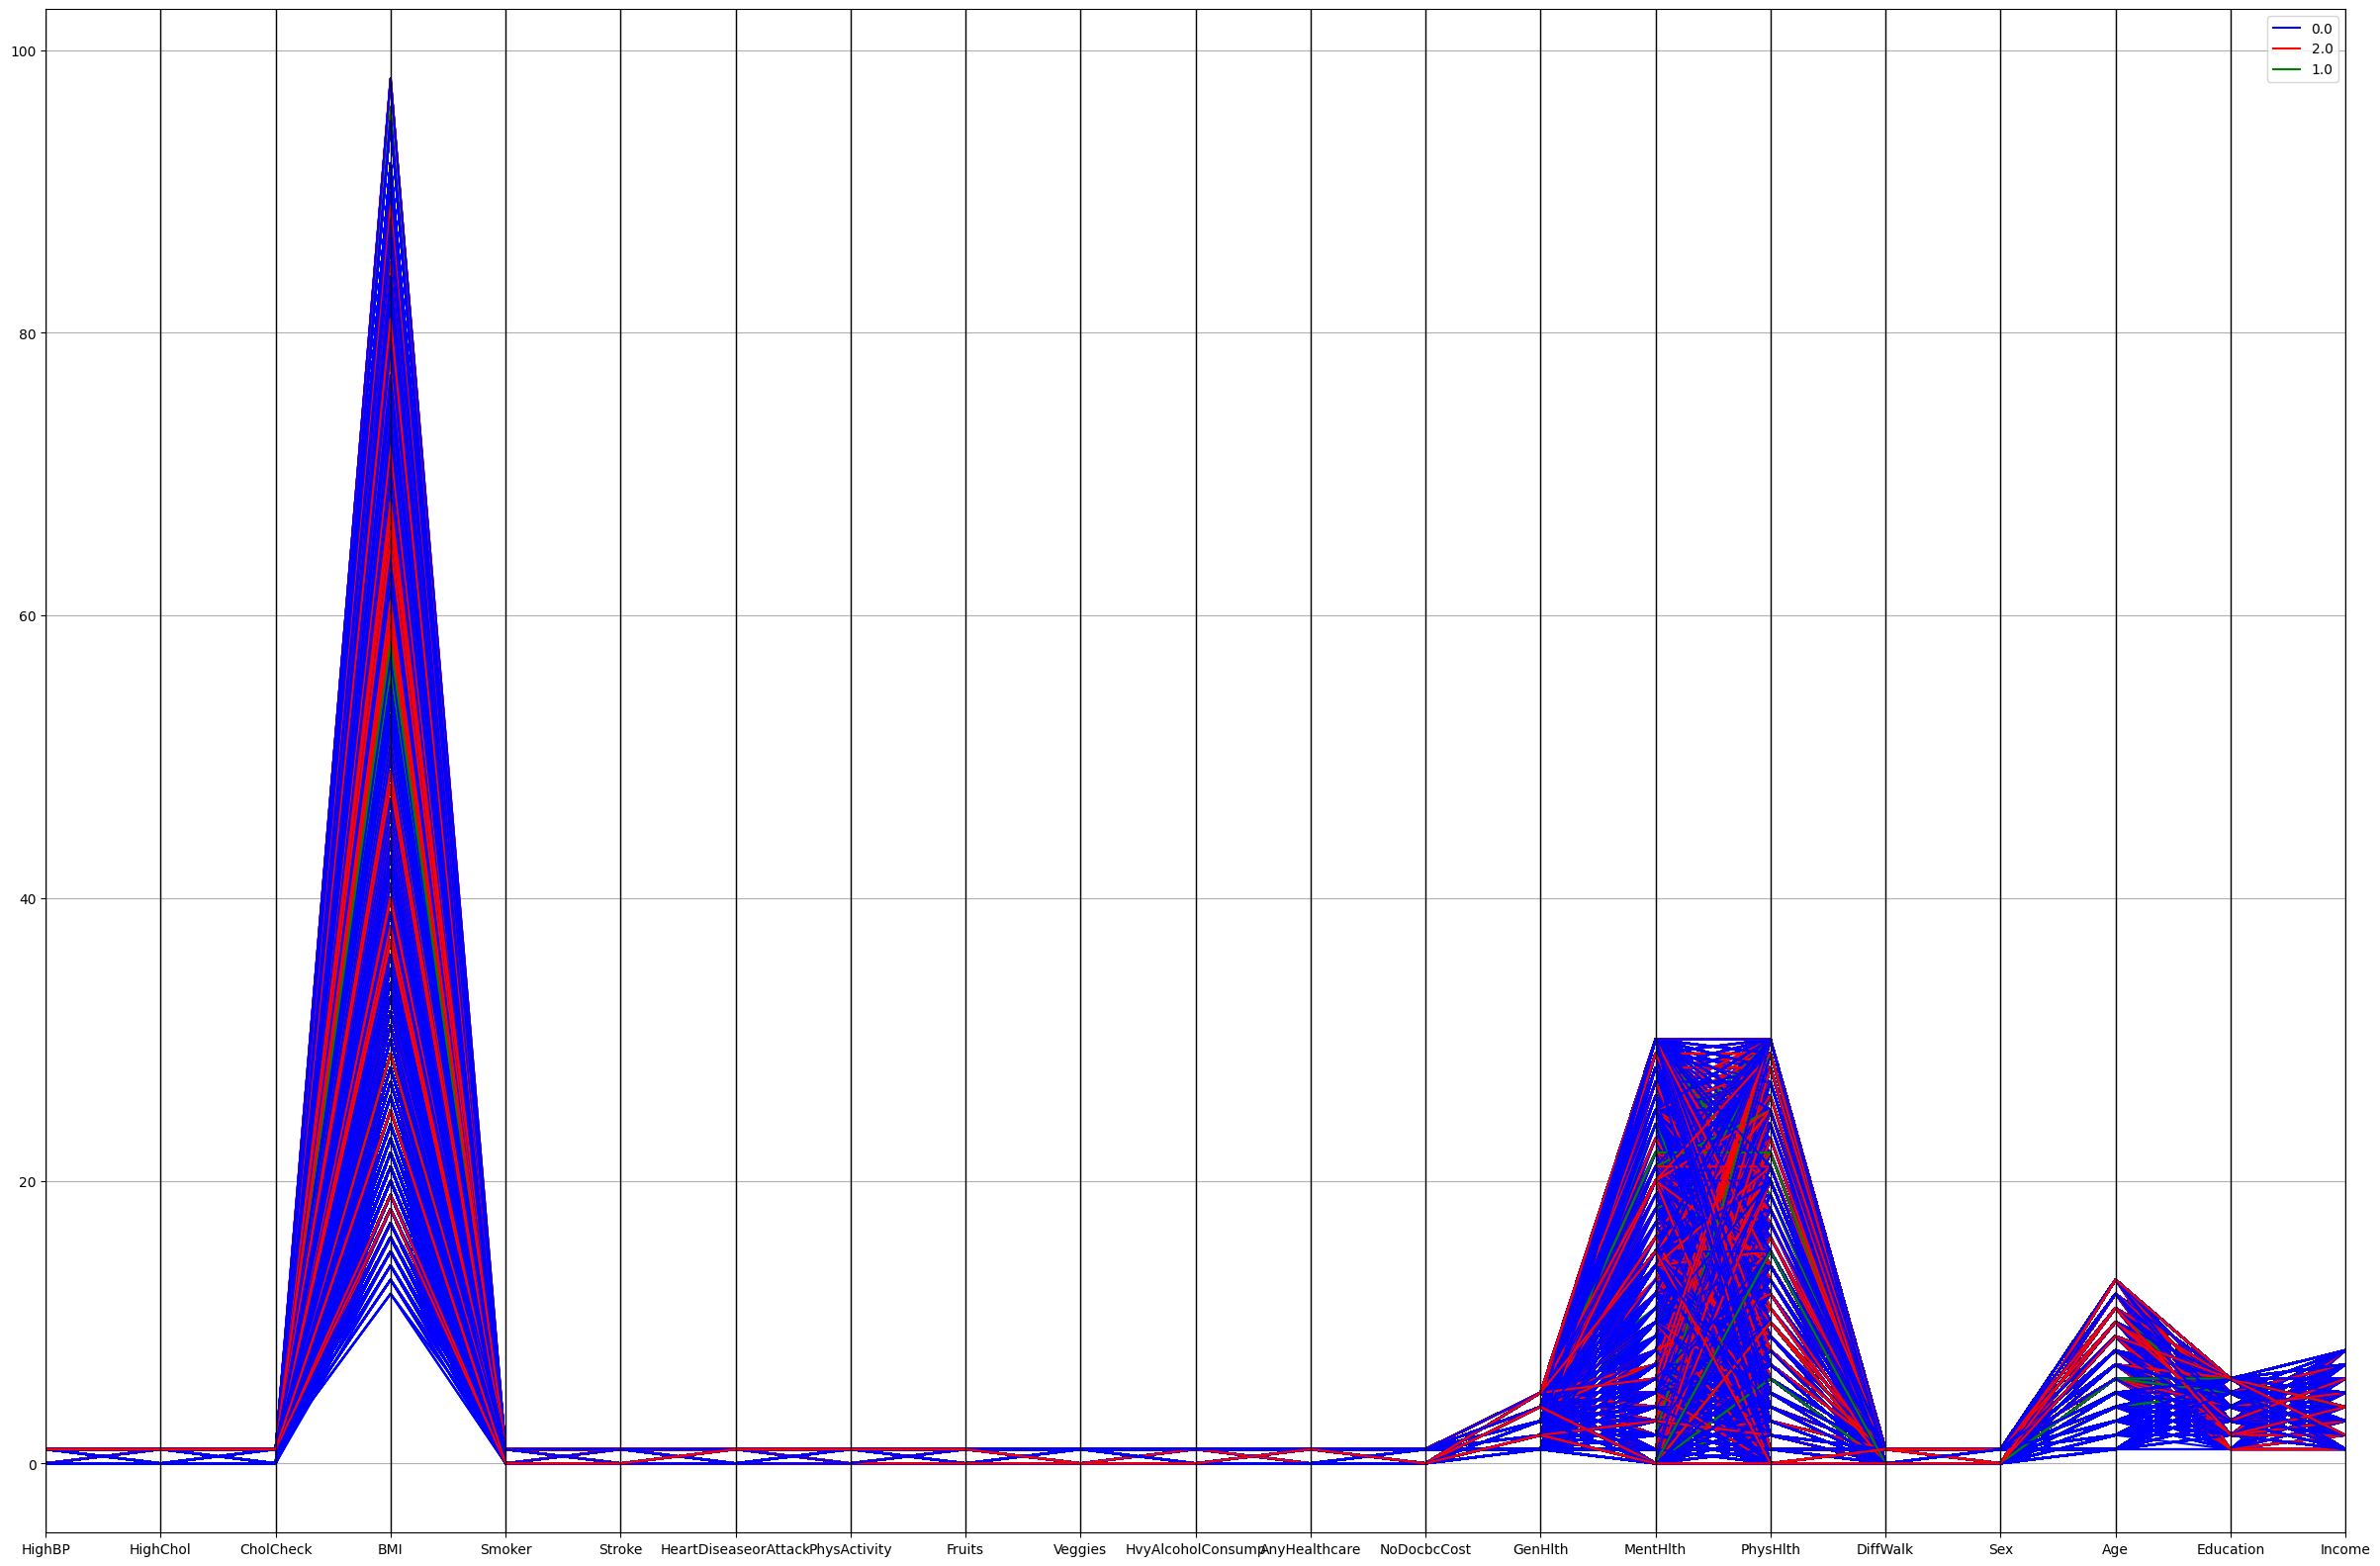

In [86]:
# Parallel Coordinates
plt.figure(figsize=(30, 20))
parallel_coordinates(dataset, "Diabetes_012", color = ['blue', 'red', 'green']);

# Create Features Matrix & Target Variable

In [144]:
# Feature matrix
X = dataset[['HighBP', 'HighChol', 'BMI', 'Stroke' , 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'Age']]
X

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,Age
0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,15.0,9.0
1,0.0,0.0,25.0,0.0,0.0,1.0,3.0,0.0,7.0
2,1.0,1.0,28.0,0.0,0.0,0.0,5.0,30.0,9.0
3,1.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0,11.0
4,1.0,1.0,24.0,0.0,0.0,1.0,2.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,0.0,0.0,3.0,5.0,5.0
253676,1.0,1.0,18.0,0.0,0.0,0.0,4.0,0.0,11.0
253677,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,2.0
253678,1.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,7.0


In [145]:
# Target variable
y = dataset['Diabetes_012']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 229781, dtype: float64

# Split the dataset into training and testing sets

In [146]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (160846, 9)
y_train shape:  (160846,)
X_test shape:  (68935, 9)
y_test shape:  (68935,)


# Create Model: Naive Bayes

In [147]:
# Create Model: Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_nb = model_nb.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_pred_nb, y_test).round(4)

print("----------------------------------")
print("Accuracy of Naive Bayes: ", score_nb)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = pd.DataFrame({'Model': ['Naive Bayes'], 'Accuracy': [score_nb]})
model_accuracy

----------------------------------
Accuracy of Naive Bayes:  0.7742
----------------------------------


,Model,Accuracy
0,Naive Bayes,0.7742


# Create Model: K Nearest Neighbours (KNN)

In [148]:
# Create Model: K Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=300)

# Train the model using the training sets
model_knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_knn = model_knn.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_pred_knn, y_test).round(4)

print("----------------------------------")
print("Accuracy of K Nearest Neighbours: ", score_knn)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'K Nearest Neighbours', 'Accuracy': score_knn}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of K Nearest Neighbours:  0.8302
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_10384\2891514585.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'K Nearest Neighbours', 'Accuracy': score_knn}, ignore_index=True)


,Model,Accuracy
0,Naive Bayes,0.7742
1,K Nearest Neighbours,0.8302


# Create Model: Decision Tree

In [149]:
# Create Model: Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=4)

# Train the model using the training sets
model_dt.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = model_dt.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_pred_dt, y_test).round(4)

print("----------------------------------")
print("Accuracy of Decision Tree: ", score_dt)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': score_dt}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Decision Tree:  0.7975
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_10384\3990903316.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': score_dt}, ignore_index=True)


,Model,Accuracy
0,Naive Bayes,0.7742
1,K Nearest Neighbours,0.8302
2,Decision Tree,0.7975


# Create Model: Logistic Regression

In [150]:
# Create Model: Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier
model_lr = LogisticRegression()

# Train the model using the training sets
model_lr.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_lr = model_lr.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_pred_lr, y_test).round(4)

print("----------------------------------")
print("Accuracy of Logistic Regression: ", score_lr)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Logistic Regression', 'Accuracy': score_lr}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Logistic Regression:  0.83
----------------------------------


c:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahdi\AppData\Local\Temp\ipykernel_10384\2435363254.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Logistic Regression', 'Accuracy': score_lr}, ignore_index=True)


,Model,Accuracy
0,Naive Bayes,0.7742
1,K Nearest Neighbours,0.8302
2,Decision Tree,0.7975
3,Logistic Regression,0.8300


# Create Model: Support Vector Machine (SVM)

In [151]:
# Create Model: Support Vector Machine (SVM)
from sklearn import svm # "Support Vector Classifier"

# Create a svm Classifier
model_svm = svm.SVC()

# Train the model using the training sets
model_svm.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_svm = model_svm.predict(X_test)

# checking the accuracy of the algorithm by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_pred_svm, y_test).round(4)

print("----------------------------------")
print("Accuracy of Support Vector Machine: ", score_svm)
print("----------------------------------")

# save the accuracy score of the model
model_accuracy = model_accuracy.append({'Model': 'Support Vector Machine', 'Accuracy': score_svm}, ignore_index=True)
model_accuracy

----------------------------------
Accuracy of Support Vector Machine:  0.8282
----------------------------------


C:\Users\mahdi\AppData\Local\Temp\ipykernel_10384\1890861740.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_accuracy = model_accuracy.append({'Model': 'Support Vector Machine', 'Accuracy': score_svm}, ignore_index=True)


,Model,Accuracy
0,Naive Bayes,0.7742
1,K Nearest Neighbours,0.8302
2,Decision Tree,0.7975
3,Logistic Regression,0.8300
4,Support Vector Machine,0.8282


# Compare Accuracy Score of Different Models

                    Model  Accuracy
1    K Nearest Neighbours    0.8302
3     Logistic Regression    0.8300
4  Support Vector Machine    0.8282
2           Decision Tree    0.7975
0             Naive Bayes    0.7742


Text(0, 0.5, 'Model')

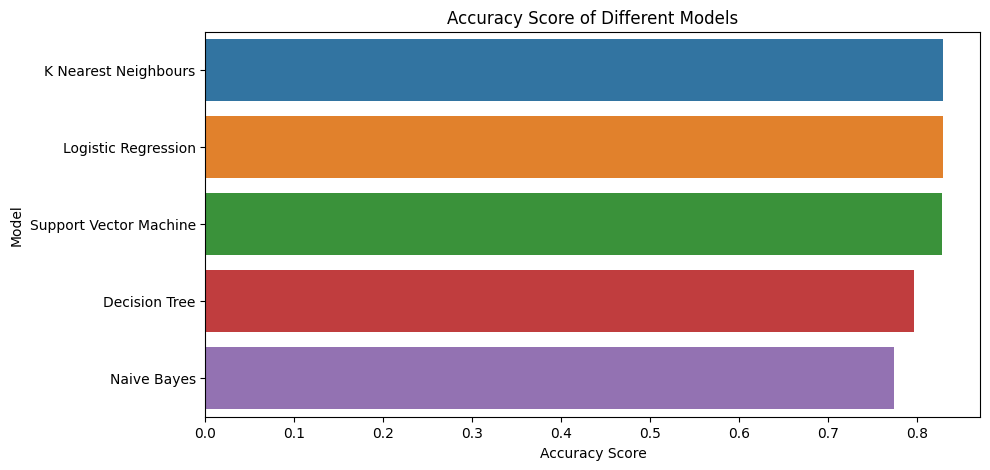

In [175]:
# Compare Accuracy Score of Different Models
model_accuracy.sort_values(by='Accuracy', ascending=False, inplace=True)
print(model_accuracy)

# Plot Accuracy Score of Different Models
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=model_accuracy,)
plt.title('Accuracy Score of Different Models')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')